<a href="https://colab.research.google.com/github/bell0134/kensakugijutu/blob/main/%E6%A4%9C%E7%B4%A2%E6%8A%80%E8%A1%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

検索技術最終課題

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

import csv
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/drive/MyDrive/練習

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/drive/MyDrive/練習'
/content


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/練習/world_happiness_2015.csv")
data.head()
# data = pd.read_csv("/content/gdrive/MyDrive/kensaku/India_Road_Population_Data.csv")
# data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
columns = ['Happiness Score','Standard Error','Family','Health (Life Expectancy)']
data = data[columns]
data.isnull().sum()
# df['Happiness Score','Standard Error','Family','Health ']

Happiness Score             0
Standard Error              0
Family                      0
Health (Life Expectancy)    0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(data)
data_sc = pd.DataFrame(data_sc, columns=data.columns)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=1)
model.fit(data_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [11]:
cluster = model.labels_
data['cluster'] = cluster
data.groupby('cluster').mean().style.bar(axis=0)

,Happiness Score,Standard Error,Family,Health (Life Expectancy)
cluster,,,,
0,6.710646,0.039598,1.244223,0.841142
1,4.104138,0.044866,0.551043,0.464960
2,5.336078,0.048929,1.019476,0.723687
3,5.413667,0.106078,1.035018,0.400705
4,4.317208,0.051337,0.944957,0.267085


<Axes: xlabel='cluster', ylabel='Health (Life Expectancy)'>

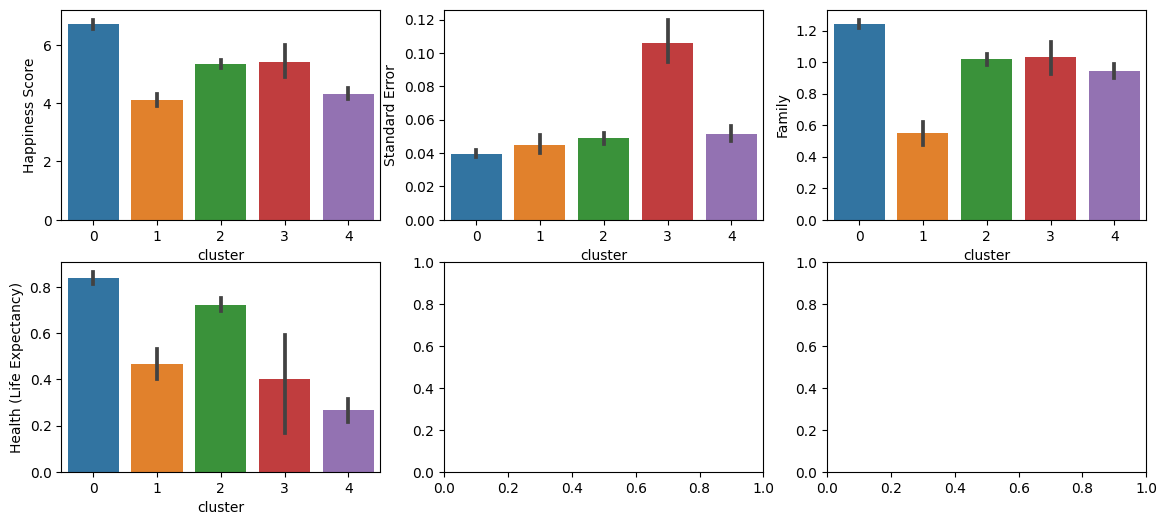

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3, figsize=(14, 6))
sns.barplot(ax=axes[0,0], data=data, x='cluster', y='Happiness Score')
sns.barplot(ax=axes[0,1], data=data, x='cluster', y='Standard Error')
sns.barplot(ax=axes[0,2], data=data, x='cluster', y='Family')
sns.barplot(ax=axes[1,0], data=data, x='cluster', y='Health (Life Expectancy)')
# sns.barplot(ax=axes[1,1], data=data, x='cluster', y='sex_male')

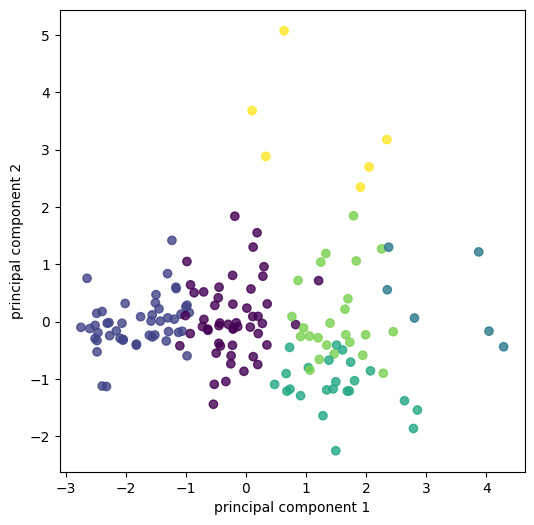

In [9]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(data_sc)
feature = pca.transform(data_sc)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=cluster)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.show()